In [2]:
import random
from scipy.stats import gmean
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D   
from matplotlib import cm
from multiprocessing import Process
import matplotlib.patches as patches
from scipy.stats import erlang
from matplotlib import cm
import sys
import os
sys.path.append("..")
sys.path.append(
    os.path.join(os.path.dirname(os.path.abspath('__file__')), 'src')
)
from src.PopulationDynamicsModel import *


# シミュレーション: $N=3,E=2,\Delta\tau=100$

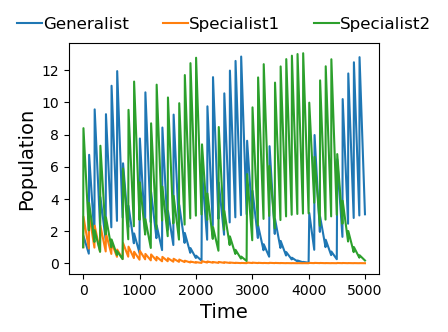

In [3]:
random.seed(100)
np.random.seed(100)

env_change_num=50
tauList = np.full(env_change_num,100)

n = 3
E = 2
A = np.zeros((n,n))

p = 10**(-4)
for i in range(n):
    for j in range(n):
        if abs(i-j)==1:
                A[i,j] = p
        else:
            A[i,j] = 0
for i in range(n):
    A[i,i] = 1 - sum(A[i,:])

a = 0.01
b=1


v = np.zeros((n,E))
gamma = np.zeros((n,E))

for i in range(n):
    p = i-n//2
    v[i] = np.array([(2)**(p),(2)**(-p)])*(0.2)
    
gamma = a*np.exp(b*v)
X_0 = np.zeros(n)
for i in range(n):
    X_0[i] = 1
N,t,N_mean,tau_course = Simulation(n, E, v, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))

#結果の描画
plt.figure(figsize=(4,3))
#plt.plot(t,N[:,1])
plt.plot(t,N[:,0])
plt.plot(t,N[:,1])
plt.plot(t,N[:,2])
plt.xlabel("Time",fontsize=14)
plt.ylabel("Population",fontsize=14)
plt.legend(["Generalist","Specialist1","Specialist2"],loc='lower center',bbox_to_anchor=(0.5,1.02),borderaxespad=0,frameon=False,fontsize=12,handletextpad=0.1,ncol=3,handlelength=1.5)

plt.show()


# 栄養供給がランダムな場合のシミュレーション

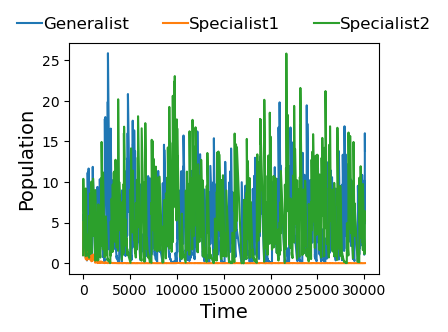

In [5]:
random.seed(100)
np.random.seed(100)

env_change_num=300
tauList = erlang.rvs(a = 2,scale = 50,size=env_change_num)
n = 3
E = 2
A = np.zeros((n,n))

p = 10**(-4)
for i in range(n):
    for j in range(n):
        if abs(i-j)==1:
                A[i,j] = p
        else:
            A[i,j] = 0
for i in range(n):
    A[i,i] = 1 - sum(A[i,:])

a = 0.01
b=1


v = np.zeros((n,E))
gamma = np.zeros((n,E))

for i in range(n):
    p = i-n//2
    v[i] = np.array([(2)**(p),(2)**(-p)])*(0.2)
    
gamma = a*np.exp(b*v)
X_0 = np.zeros(n)
for i in range(n):
    X_0[i] = 1
N,t,N_mean,tau_course = Simulation(n, E, v, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))

#結果の描画
plt.figure(figsize=(4,3))
#plt.plot(t,N[:,1])
plt.plot(t,N[:,0])
plt.plot(t,N[:,1])
plt.plot(t,N[:,2])
plt.xlabel("Time",fontsize=14)
plt.ylabel("Population",fontsize=14)
plt.legend(["Generalist","Specialist1","Specialist2"],loc='lower center',bbox_to_anchor=(0.5,1.02),borderaxespad=0,frameon=False,fontsize=12,handletextpad=0.1,ncol=3,handlelength=1.5)

plt.show()
